# Proyek Klasifikasi Gambar: Food-11 image dataset
by: trolukovich on Kaggle (trolukovich/food11-image-dataset)

- **Nama:** Putu Nadya Putri Astina
- **Email:** m014d5x1588@student.devacademy.id
- **ID Dicoding:** M014D5X1588

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.19.0


## Data Preparation

### Data Loading

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadyaputria","key":"f437f31d8ff05bca66dd122c2010f942"}'}

In [ ]:
# Download kaggle dataset and unzip the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset
!kaggle datasets download -d trolukovich/food11-image-dataset

# Unzip dataset
!unzip food11-image-dataset.zip -d food-image

Streaming output truncated to the last 5000 lines.
  inflating: food-image/training/Soup/223.jpg  
  inflating: food-image/training/Soup/224.jpg  
  inflating: food-image/training/Soup/225.jpg  
  inflating: food-image/training/Soup/226.jpg  
  inflating: food-image/training/Soup/227.jpg  
  inflating: food-image/training/Soup/228.jpg  
  inflating: food-image/training/Soup/229.jpg  
  inflating: food-image/training/Soup/23.jpg  
  inflating: food-image/training/Soup/230.jpg  
  inflating: food-image/training/Soup/231.jpg  
  inflating: food-image/training/Soup/232.jpg  
  inflating: food-image/training/Soup/233.jpg  
  inflating: food-image/training/Soup/234.jpg  
  inflating: food-image/training/Soup/235.jpg  
  inflating: food-image/training/Soup/236.jpg  
  inflating: food-image/training/Soup/237.jpg  
  inflating: food-image/training/Soup/238.jpg  
  inflating: food-image/training/Soup/239.jpg  
  inflating: food-image/training/Soup/24.jpg  
  inflating: food-image/training/Soup/2

In [ ]:
from PIL import Image
import os

def print_images_resolution(directory):
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue  # skip file non-folder

        unique_sizes = set()
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except:
                print(f"⚠️ gagal buka: {img_path}")

        print("Ukuran unik:")
        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal semua gambar: {total_images}")

# Contoh pemanggilan
print_images_resolution("food-image/training")
print_images_resolution("food-image/validation")
print_images_resolution("food-image/evaluation")

Soup: 1500
Ukuran unik:
- (405, 512)
- (512, 342)
- (512, 461)
- (512, 287)
- (341, 512)
- (512, 403)
- (508, 512)
- (477, 512)
- (512, 299)
- (512, 418)
- (512, 308)
- (512, 366)
- (288, 512)
- (512, 384)
- (510, 512)
- (512, 329)
- (512, 509)
- (446, 512)
- (512, 512)
- (382, 512)
- (380, 512)
- (512, 341)
- (512, 280)
- (512, 350)
- (512, 289)
- (512, 356)
- (512, 304)
- (512, 368)
- (512, 307)
- (512, 487)
- (340, 512)
- (384, 512)
- (307, 512)
- (287, 512)
- (507, 512)
- (408, 512)
- (386, 512)
- (512, 380)
- (289, 512)
- (512, 502)
- (512, 383)
- (512, 511)
- (512, 343)
- (512, 340)
- (443, 512)
- (512, 288)
- (512, 352)
- (511, 512)
- (489, 512)
- (346, 512)
- (512, 306)
- (381, 512)
- (306, 512)
- (512, 504)
- (512, 382)
- (512, 385)
- (512, 510)
- (512, 449)
- (504, 512)
- (512, 339)
- (383, 512)
---------------
Meat: 1325
Ukuran unik:
- (512, 342)
- (506, 512)
- (512, 287)
- (341, 512)
- (512, 345)
- (512, 467)
- (512, 470)
- (512, 354)
- (512, 308)
- (512, 366)
- (512, 372)


### Data Preprocessing

#### Proporsi Data

In [ ]:
import os
from collections import defaultdict

data_dir = 'food-image'
label_counts = defaultdict(int)
total_images = 0

# Iterate through the subdirectories (training, validation, evaluation)
for split_dir in os.listdir(data_dir):
    split_dir_path = os.path.join(data_dir, split_dir)
    if os.path.isdir(split_dir_path):
        # Iterate through the label directories within each split directory
        for label_dir in os.listdir(split_dir_path):
            label_dir_path = os.path.join(split_dir_path, label_dir)
            if os.path.isdir(label_dir_path):
                num_images = len(os.listdir(label_dir_path))
                label_counts[label_dir] += num_images
                total_images += num_images

print("Jumlah gambar per label:")
for label, count in label_counts.items():
    percentage = (count / total_images) * 100
    print(f"- {label}: {count} ({percentage:.2f}%)")

print(f"\nTotal semua gambar: {total_images}")

Jumlah gambar per label:
- Soup: 2500 (15.02%)
- Meat: 2206 (13.25%)
- Rice: 472 (2.84%)
- Bread: 1724 (10.36%)
- Dessert: 2500 (15.02%)
- Seafood: 1505 (9.04%)
- Dairy product: 721 (4.33%)
- Noodles-Pasta: 734 (4.41%)
- Egg: 1648 (9.90%)
- Fried food: 1461 (8.78%)
- Vegetable-Fruit: 1172 (7.04%)

Total semua gambar: 16643


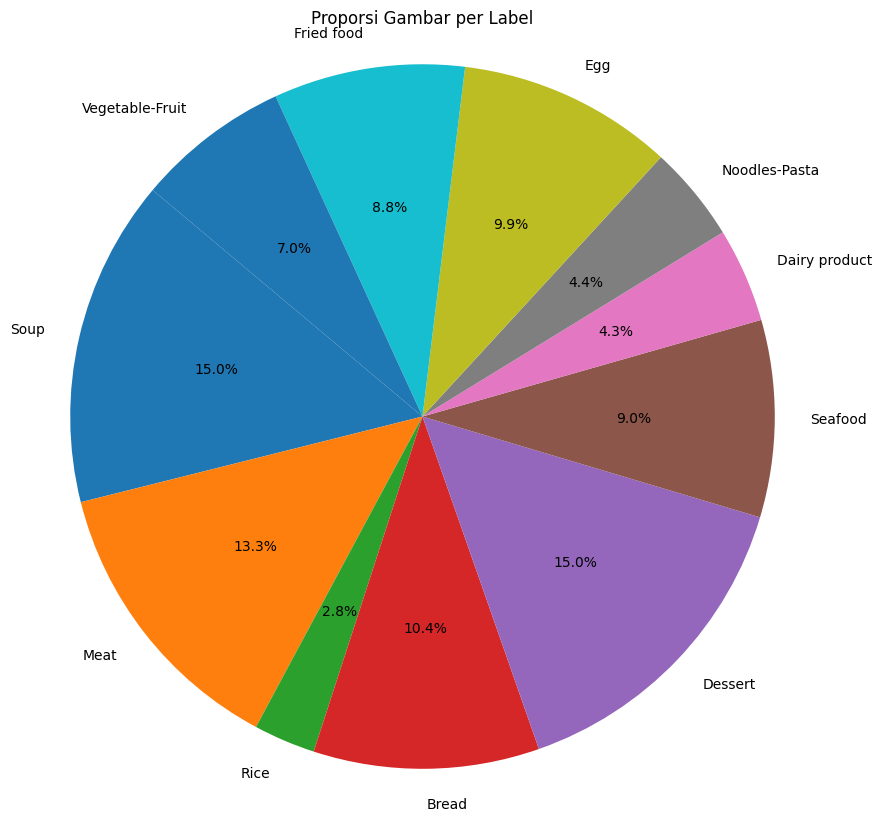

In [ ]:
import matplotlib.pyplot as plt

labels = list(label_counts.keys())
sizes = list(label_counts.values())

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporsi Gambar per Label')
plt.show()

#### Resize Ukuran

In [ ]:
from PIL import Image
import os

def resize_images(input_dir, output_dir, size):
    """
    Mengubah ukuran semua gambar dalam direktori dan menyimpannya di direktori baru.

    Args:
        input_dir (str): Jalur ke direktori input yang berisi sub-direktori split (training, validation, evaluation).
        output_dir (str): Jalur ke direktori output untuk menyimpan gambar yang diubah ukurannya.
        size (tuple): Ukuran target untuk gambar (lebar, tinggi).
    """
    # Membuat direktori output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through the split directories (training, validation, evaluation)
    for split_dir in os.listdir(input_dir):
        split_dir_path = os.path.join(input_dir, split_dir)
        output_split_dir_path = os.path.join(output_dir, split_dir)

        if os.path.isdir(split_dir_path):
            # Membuat sub-direktori output untuk setiap split
            if not os.path.exists(output_split_dir_path):
                os.makedirs(output_split_dir_path)

            # Iterate through the label directories within each split directory
            for label_dir in os.listdir(split_dir_path):
                label_dir_path = os.path.join(split_dir_path, label_dir)
                output_label_dir_path = os.path.join(output_split_dir_path, label_dir)

                if os.path.isdir(label_dir_path):
                    # Membuat sub-direktori output untuk setiap label within the split
                    if not os.path.exists(output_label_dir_path):
                        os.makedirs(output_label_dir_path)

                    image_files = os.listdir(label_dir_path)
                    print(f"Memproses {split_dir}/{label_dir}...")
                    for img_file in image_files:
                        img_path = os.path.join(label_dir_path, img_file)
                        output_img_path = os.path.join(output_label_dir_path, img_file)

                        try:
                            with Image.open(img_path) as img:
                                # Mengubah ukuran gambar
                                img_resized = img.resize(size)
                                # Menyimpan gambar yang diubah ukurannya
                                img_resized.save(output_img_path)
                        except Exception as e:
                            print(f"⚠️ Gagal memproses {img_path}: {e}")

# Contoh penggunaan:
# Tentukan direktori input (dataset yang sudah di-unzip) dan direktori output
input_directory = 'food-image'
output_directory = 'food-image-resized'
# Tentukan ukuran target (misalnya, 224x224 piksel)
target_size = (224, 224)

# Panggil fungsi untuk mengubah ukuran gambar
resize_images(input_directory, output_directory, target_size)

Memproses validation/Soup...
Memproses validation/Meat...
Memproses validation/Rice...
Memproses validation/Bread...
Memproses validation/Dessert...
Memproses validation/Seafood...
Memproses validation/Dairy product...
Memproses validation/Noodles-Pasta...
Memproses validation/Egg...
Memproses validation/Fried food...
Memproses validation/Vegetable-Fruit...
Memproses evaluation/Soup...
Memproses evaluation/Meat...
Memproses evaluation/Rice...
Memproses evaluation/Bread...
Memproses evaluation/Dessert...
Memproses evaluation/Seafood...
Memproses evaluation/Dairy product...
Memproses evaluation/Noodles-Pasta...
Memproses evaluation/Egg...
Memproses evaluation/Fried food...
Memproses evaluation/Vegetable-Fruit...
Memproses training/Soup...
Memproses training/Meat...
Memproses training/Rice...
Memproses training/Bread...
Memproses training/Dessert...
Memproses training/Seafood...
Memproses training/Dairy product...
Memproses training/Noodles-Pasta...
Memproses training/Egg...
Memproses tra

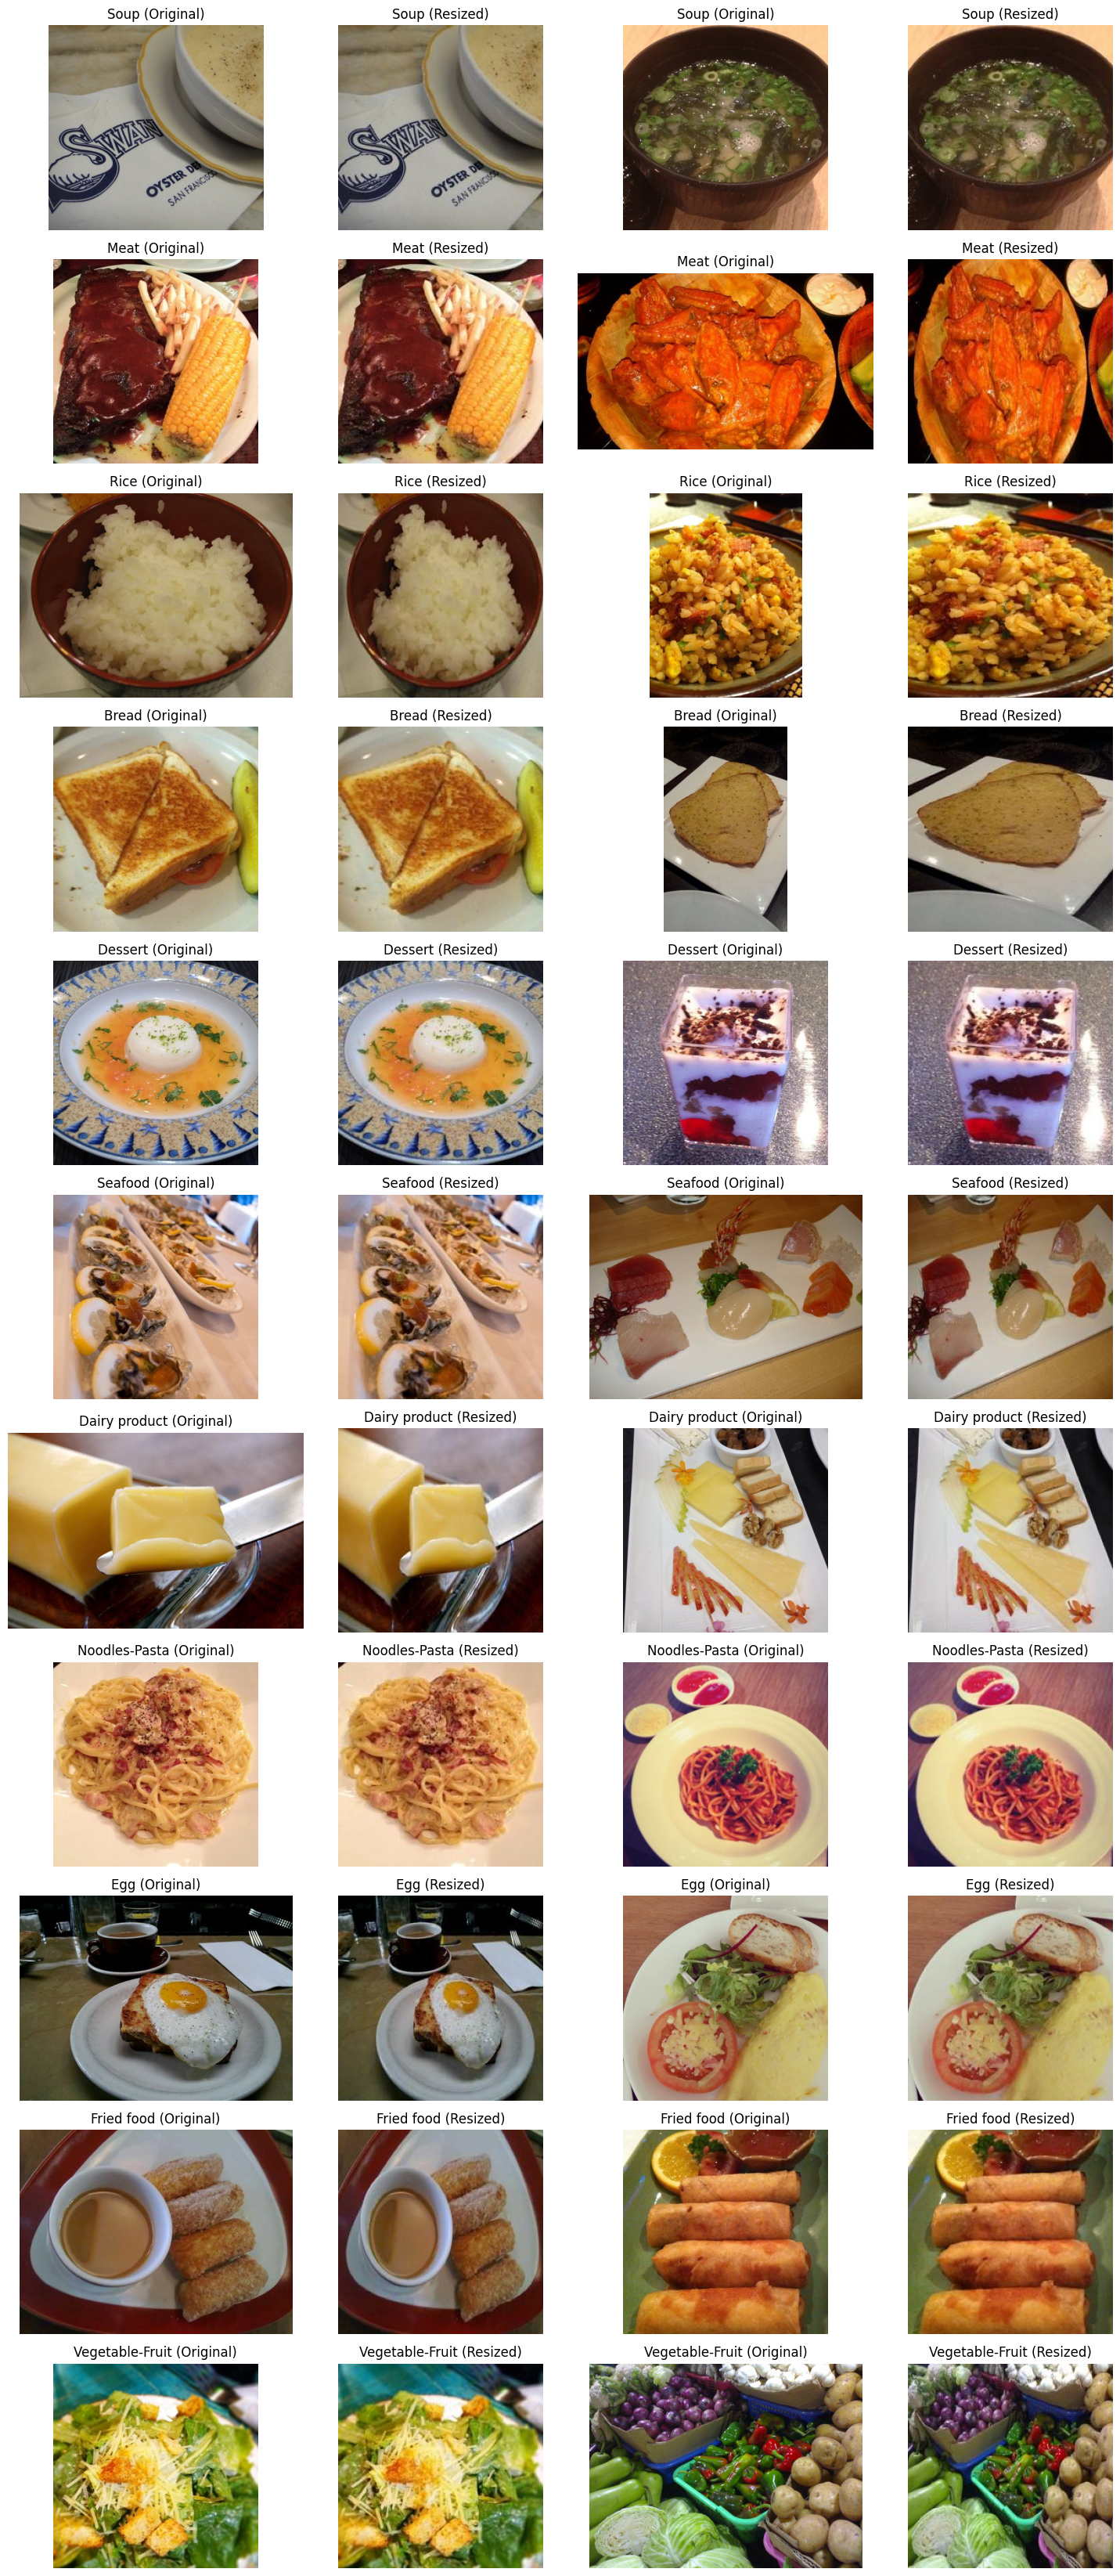

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Tentukan direktori dataset asli dan yang sudah di-resize
original_dir = 'food-image/training' # Use the original data directory for comparison
resized_dir = 'food-image-resized/training'

# Dapatkan daftar semua label (nama sub-direktori)
labels = os.listdir(resized_dir)
labels = [label for label in labels if os.path.isdir(os.path.join(resized_dir, label))] # Filter hanya direktori

# Tentukan berapa banyak contoh gambar per label yang ingin ditampilkan
num_examples_per_label = 2

# Sesuaikan ukuran figure untuk menampilkan dua kolom (asli dan resized)
plt.figure(figsize=(15, len(labels) * 3))

for i, label in enumerate(labels):
    original_label_dir = os.path.join(original_dir, label)
    resized_label_dir = os.path.join(resized_dir, label)

    # Pastikan direktori label ada di kedua lokasi
    if not os.path.isdir(original_label_dir) or not os.path.isdir(resized_label_dir):
        print(f"⚠️ Direktori label {label} tidak ditemukan di kedua lokasi.")
        continue

    image_files = os.listdir(resized_label_dir) # Ambil nama file dari direktori resized
    # Ambil beberapa contoh gambar secara acak
    sample_images = random.sample(image_files, min(num_examples_per_label, len(image_files)))

    for j, img_file in enumerate(sample_images):
        original_img_path = os.path.join(original_label_dir, img_file)
        resized_img_path = os.path.join(resized_label_dir, img_file)

        # Tampilkan gambar asli
        try:
            img_original = Image.open(original_img_path)
            plt.subplot(len(labels), num_examples_per_label * 2, i * num_examples_per_label * 2 + j * 2 + 1)
            plt.imshow(img_original)
            plt.title(f'{label} (Original)')
            plt.axis('off')
        except Exception as e:
            print(f"⚠️ Gagal menampilkan gambar asli {original_img_path}: {e}")

        # Tampilkan gambar yang sudah di-resize
        try:
            img_resized = Image.open(resized_img_path)
            plt.subplot(len(labels), num_examples_per_label * 2, i * num_examples_per_label * 2 + j * 2 + 2)
            plt.imshow(img_resized)
            plt.title(f'{label} (Resized)')
            plt.axis('off')
        except Exception as e:
            print(f"⚠️ Gagal menampilkan gambar resized {resized_img_path}: {e}")


plt.tight_layout()
plt.show()

#### Split Dataset

In [ ]:
import os

data_dir = 'food-image-resized' # Use the resized data directory
split_counts = {}
total_images_all_splits = 0

# Iterate through the split directories (training, validation, evaluation)
for split_dir in os.listdir(data_dir):
    split_dir_path = os.path.join(data_dir, split_dir)
    if os.path.isdir(split_dir_path):
        num_images_in_split = 0
        # Iterate through the label directories within each split directory
        for label_dir in os.listdir(split_dir_path):
            label_dir_path = os.path.join(split_dir_path, label_dir)
            if os.path.isdir(label_dir_path):
                num_images_in_split += len(os.listdir(label_dir_path))
        split_counts[split_dir] = num_images_in_split
        total_images_all_splits += num_images_in_split

print("Jumlah gambar per set data:")
for split, count in split_counts.items():
    percentage = (count / total_images_all_splits) * 100
    print(f"- {split}: {count} ({percentage:.2f}%)")

print(f"\nTotal semua gambar di semua set: {total_images_all_splits}")

Jumlah gambar per set data:
- validation: 3430 (20.61%)
- evaluation: 3347 (20.11%)
- training: 9866 (59.28%)

Total semua gambar di semua set: 16643


#### Normalisasi Data

Normalisasi data gambar adalah proses penskalaan nilai piksel ke rentang tertentu, biasanya [0, 1] atau [-1, 1]. Ini membantu model belajar lebih efektif karena semua fitur (piksel) memiliki skala yang serupa. Kita akan menggunakan `ImageDataGenerator` dari Keras untuk melakukan normalisasi dengan membagi setiap nilai piksel dengan 255.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan path untuk training, validation, dan evaluation data
train_dir = 'food-image-resized/training'
validation_dir = 'food-image-resized/validation'
evaluation_dir = 'food-image-resized/evaluation'

# Definisikan parameter untuk generator
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16

# Buat instance ImageDataGenerator untuk normalisasi
# Rescale 1./255 akan menskalakan nilai piksel dari [0, 255] menjadi [0, 1]
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,           # Increased rotation
    width_shift_range=0.3,       # Increased shift
    height_shift_range=0.3,      # Increased shift
    shear_range=0.3,            # Added shear transformation
    zoom_range=0.3,             # Increased zoom
    horizontal_flip=True,
    brightness_range=[0.7, 1.3], # Added brightness variation
    fill_mode='nearest',
    channel_shift_range=0.2     # Added channel shift
)

# Validation and test - only normalization
validation_datagen = ImageDataGenerator(rescale=1./255)
evaluation_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator untuk data training, validation, dan evaluation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

evaluation_generator = evaluation_datagen.flow_from_directory(
    evaluation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nNormalisasi data selesai dan generator telah dibuat.")

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.

Normalisasi data selesai dan generator telah dibuat.


## Modelling

In [ ]:
# Model sequential
model = Sequential([
    # Block 1 - Enhanced
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), name='conv2d_1'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_1'),
    Dropout(0.3),  # Increased dropout

    # Block 2 - Enhanced
    Conv2D(64, (3, 3), activation='relu', name='conv2d_3'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', name='conv2d_4'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_2'),
    Dropout(0.3),  # Increased dropout

    # Block 3 - Enhanced
    Conv2D(128, (3, 3), activation='relu', name='conv2d_5'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', name='conv2d_6'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_3'),
    Dropout(0.4),  # Increased dropout

    # Block 4 - Enhanced
    Conv2D(256, (3, 3), activation='relu', name='conv2d_7'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', name='conv2d_8'),  # Added extra conv layer
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_4'),
    Dropout(0.4),  # Increased dropout

    # Block 5 - New block for better feature extraction
    Conv2D(512, (3, 3), activation='relu', name='conv2d_9'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='maxpool_5'),
    Dropout(0.5),

    # Classifier - Improved
    Flatten(name='flatten'),
    Dense(1024, activation='relu', name='dense_1'),  # Increased neurons
    BatchNormalization(),
    Dropout(0.6),  # Increased dropout
    Dense(512, activation='relu', name='dense_2'),
    BatchNormalization(),
    Dropout(0.6),  # Increased dropout
    Dense(256, activation='relu', name='dense_3'),   # Added extra dense layer
    Dropout(0.5),
    Dense(11, activation='softmax', name='predictions')  # 11 classes
])

In [ ]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 220, 220, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 108, 108, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 106, 106, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 51, 51, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 49, 49, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 11,413,035 (43.54 MB)

 Trainable params: 11,407,019 (43.51 MB)

 Non-trainable params: 6,016 (23.50 KB)

In [ ]:
callbacks = [
    # Early stopping with more patience
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,  # Increased patience
        restore_best_weights=True,
        verbose=1,
        min_delta=0.001  # Added minimum improvement threshold
    ),

    # More aggressive learning rate reduction
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,    # More aggressive reduction
        patience=7,    # Reduced patience
        min_lr=1e-8,   # Lower minimum learning rate
        verbose=1,
        cooldown=3     # Added cooldown period
    ),

    # Save best model
    ModelCheckpoint(
        'best_food_model_improved.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1,
        save_weights_only=False
    )
]

In [ ]:
# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.1781 - loss: 2.3965
Epoch 1: val_accuracy improved from -inf to 0.20619, saving model to best_food_model_improved.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 166s 269ms/step - accuracy: 0.1781 - loss: 2.3964 - val_accuracy: 0.2062 - val_loss: 2.1623 - learning_rate: 5.0000e-04
Epoch 2/100
  1/616 ━━━━━━━━━━━━━━━━━━━━ 49s 81ms/step - accuracy: 0.1250 - loss: 2.2917
Epoch 2: val_accuracy improved from 0.20619 to 0.22109, saving model to best_food_model_improved.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1250 - loss: 2.2917 - val_accuracy: 0.2211 - val_loss: 2.1479 - learning_rate: 5.0000e-04
Epoch 3/100
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.2205 - loss: 2.2344
Epoch 3: val_accuracy improved from 0.22109 to 0.30520, saving model to best_food_model_improved.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 159s 257ms/step - accuracy: 0.2205 - loss: 2.2343 - val_accuracy: 0.3052 - val_loss: 2.0084 - learning_

## Evaluasi dan Visualisasi

#### Evaluasi Model pada Test Set

In [ ]:
test_loss, test_accuracy = model.evaluate(evaluation_generator, verbose=1)
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Training Loss: {train_loss:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.5545 - loss: 1.2072
617/617 ━━━━━━━━━━━━━━━━━━━━ 140s 227ms/step - accuracy: 0.6538 - loss: 1.0404
Training Accuracy: 0.6494 (64.94%)
Testing Accuracy: 0.6833 (68.33%)
Training Loss: 1.0478
Testing Loss: 0.9023


#### Plot Akurasi dan Loss

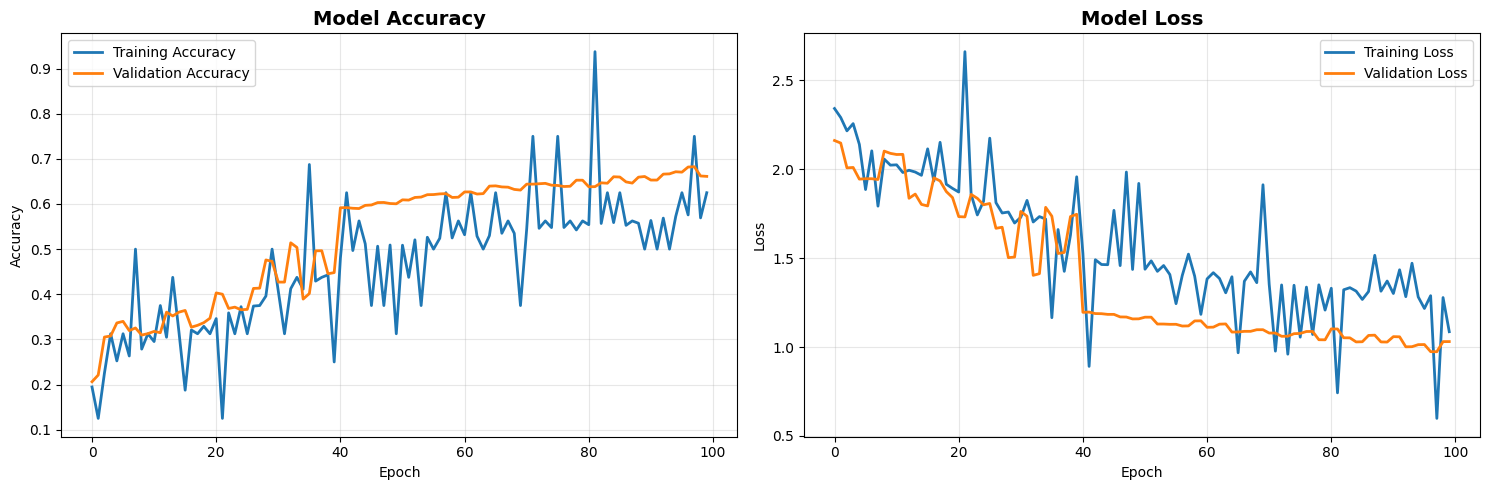

In [ ]:
def plot_training_history(history):
    """Membuat plot akurasi dan loss selama training"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot akurasi
    ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

# Buat plot
plot_training_history(history)

In [ ]:
# Setelah print hasil, tambah ini:
if train_accuracy >= 0.95 and test_accuracy >= 0.95:
    print("✅ TARGET ACHIEVED: Both accuracies ≥ 95%")
else:
    print("❌ TARGET NOT MET: Need to improve model")

❌ TARGET NOT MET: Need to improve model


## Konversi Model

In [ ]:
import tensorflow as tf

In [ ]:
# 1. SavedModel format
try:
    tf.saved_model.save(model, 'saved_model')
    print("✅ SavedModel format saved to: saved_model/")
except Exception as e:
    print(f"⚠️ Method 1 failed: {e}")
    # Cara 2: Save sebagai .keras dulu, lalu convert
    try:
        model.save('temp_model.keras')
        loaded_model = tf.keras.models.load_model('temp_model.keras')
        tf.saved_model.save(loaded_model, 'saved_model')
        print("✅ SavedModel format saved to: saved_model/ (via keras conversion)")
        import os
        os.remove('temp_model.keras')  # Clean up
    except Exception as e2:
        print(f"⚠️ SavedModel conversion failed: {e2}")
        # Cara 3: Manual export dengan concrete function
        try:
            @tf.function
            def serve(x):
                return model(x)

            concrete_func = serve.get_concrete_function(
                tf.TensorSpec([None, 224, 224, 3], tf.float32)
            )

            tf.saved_model.save(
                model,
                'saved_model',
                signatures={'serving_default': concrete_func}
            )
            print("✅ SavedModel format saved to: saved_model/ (via concrete function)")
        except Exception as e3:
            print(f"❌ All SavedModel methods failed. Using .keras as backup.")
            model.save('saved_model.keras')
            print("✅ Model saved as: saved_model.keras (use this for deployment)")

⚠️ Method 1 failed: this __dict__ descriptor does not support '_DictWrapper' objects
⚠️ SavedModel conversion failed: this __dict__ descriptor does not support '_DictWrapper' objects
❌ All SavedModel methods failed. Using .keras as backup.
✅ Model saved as: saved_model.keras (use this for deployment)


In [ ]:
# 2. TensorFlow Lite format
# Load the model from the .keras file
model = tf.keras.models.load_model('food_classifier_savedmodel.keras')

# Convert the Keras model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('food_classifier.tflite', 'wb') as f:
    f.write(tflite_model)
print("✅ TF-Lite model saved as: food_classifier.tflite")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 50 variables whereas the saved optimizer has 98 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saved artifact at '/tmp/tmpy3cus9_6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  134415436398864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415436399248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415436400016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415436399056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415436399440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415436401552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415486839376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415486844368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415486844752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415486841872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134415486843

In [ ]:
# 3. TensorFlow.js format
try:
    import tensorflowjs as tfjs
    tfjs.converters.save_keras_model(model, 'food_classifier_tfjs')
    print("✅ TensorFlow.js model saved to: food_classifier_tfjs/")
except ImportError:
    print("⚠️ TensorFlow.js converter not installed. Install with: pip install tensorflowjs")
    # Alternative: save as HDF5 first
    model.save('food_classifier.h5')
    print("✅ Model saved as HDF5: food_classifier.h5 (convert to TFJS later)")

⚠️ TensorFlow.js converter not installed. Install with: pip install tensorflowjs
✅ Model saved as HDF5: food_classifier.h5 (convert to TFJS later)


## Inference (Optional)

In [ ]:
print("\n=== INFERENCE EXAMPLE CODE ===")
print("""
# Untuk inference menggunakan TF-Lite:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load TF-Lite model
interpreter = tf.lite.Interpreter(model_path='food_classifier.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load dan preprocess image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((128, 128))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0).astype(np.float32)
    return image

# Inference
def predict_food(image_path):
    processed_image = preprocess_image(image_path)

    interpreter.set_tensor(input_details[0]['index'], processed_image)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data)
    confidence = np.max(output_data)

    class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
                   'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']

    return class_names[prediction], confidence

# Example usage:
# predicted_class, confidence = predict_food('test_image.jpg')
# print(f'Predicted: {predicted_class} (Confidence: {confidence:.2f})')
""")